### Predicting loan default is a critical task for financial institutions to mitigate risk and ensure profitability. In this project, we will develop a complex machine learning model using Random Forest to predict the loan status in a given test dataset. We will cover every aspect of the Random Forest algorithm and delve deep into data preprocessing, feature engineering, model tuning, and evaluation.

# Step1: Introduction

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes of individual trees. It is known for its robustness, ability to handle high-dimensional data, and effectiveness in preventing overfitting.

Objective: Build a Random Forest model to predict the loan status (Loan_Status) in the test dataset.

# Step2: Dataset Overview

Loan_ID: Unique Loan ID
    
Gender: Male/Female
    
Married: Applicant married (Y/N)
    
Dependents: Number of dependents
    
Education: Applicant Education (Graduate/Undergraduate)
    
Self_Employed: Self-employed (Y/N)
    
ApplicantIncome: Applicant income
    
CoapplicantIncome: Coapplicant income
    
LoanAmount: Loan amount in thousands
    
Loan_Amount_Term: Term of loan in months
    
Credit_History: Credit history meets guidelines
    
Property_Area: Urban/Semi-Urban/Rural
    
Loan_Status: Loan approved (Y/N)

# Step3: EDA

### 3.1 Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


### 3.2 Load Data

In [2]:
data = pd.read_csv('loan_data.csv')

### 3.3 Data Overview

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
data['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### 3.4 Univariate Analysis

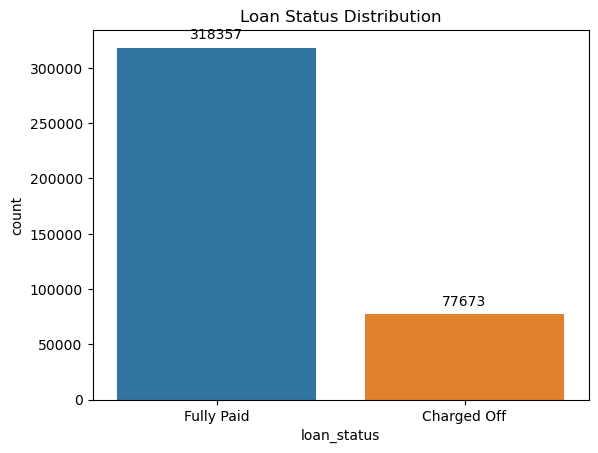

In [7]:
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
# Get the current axis (gca) and iterate over the bars to add the text on top
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


### 3.4.1 Numerical Features Distribution

In [8]:
cat_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
num_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

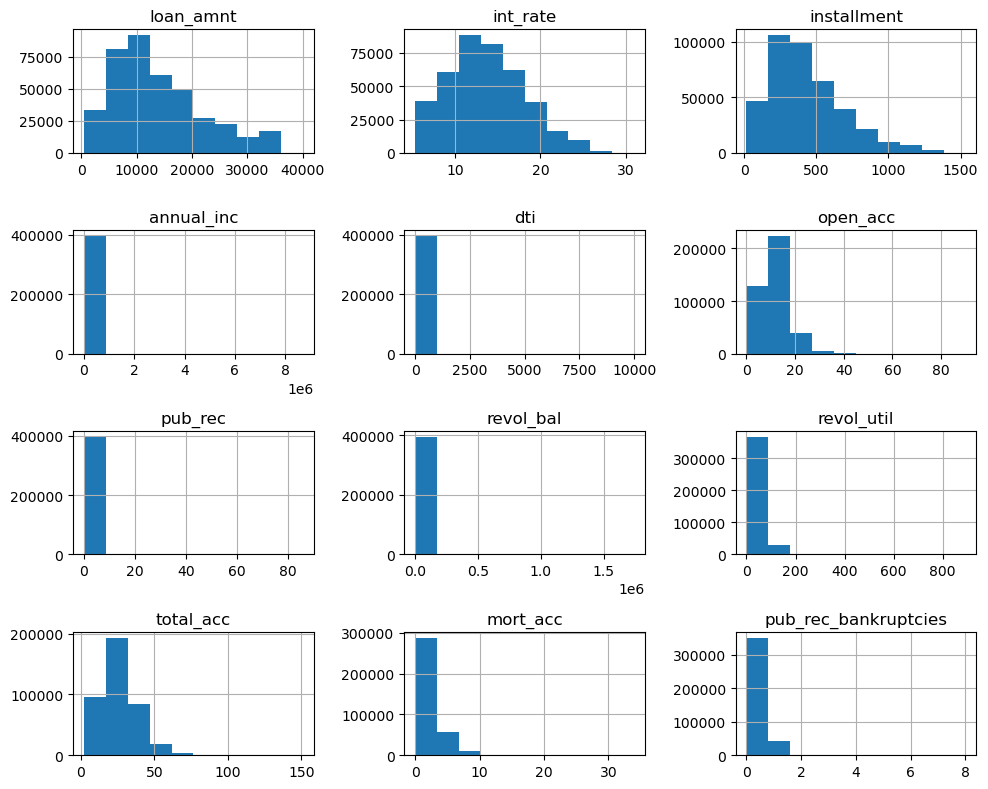

In [9]:
data[num_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### 3.4.2 Categorical Features Distribution

In [10]:
# this might take a bit of time
'''
for feature in cat_columns:
    sns.countplot(x=feature, data=data)
    plt.title(f'{feature} Distribution')
    plt.show()
'''

"\nfor feature in cat_columns:\n    sns.countplot(x=feature, data=data)\n    plt.title(f'{feature} Distribution')\n    plt.show()\n"

### 3.5 Bivariate Analysis

### 3.5.1 Loan_Status vs Numerical Features

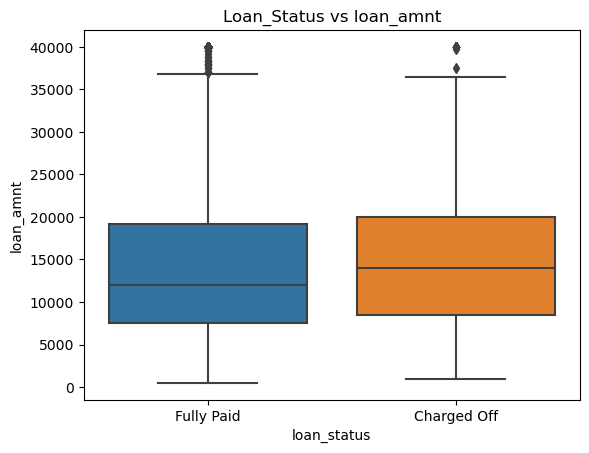

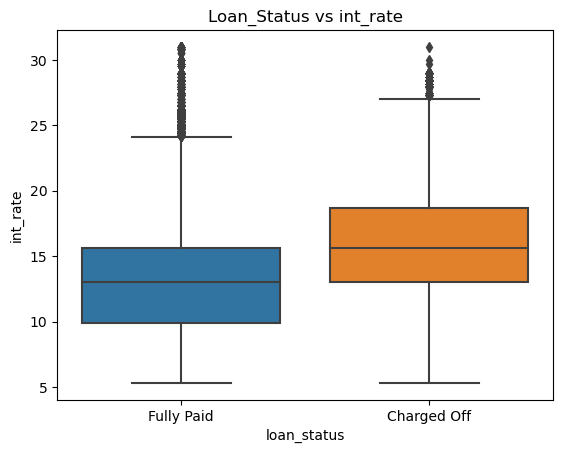

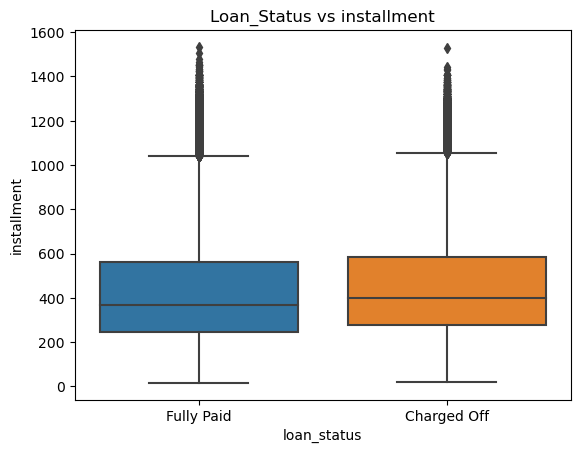

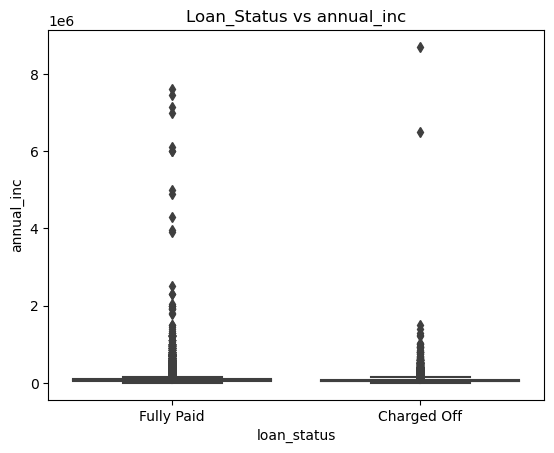

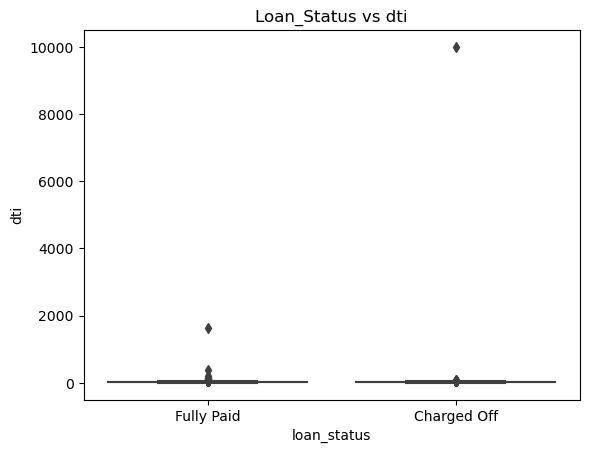

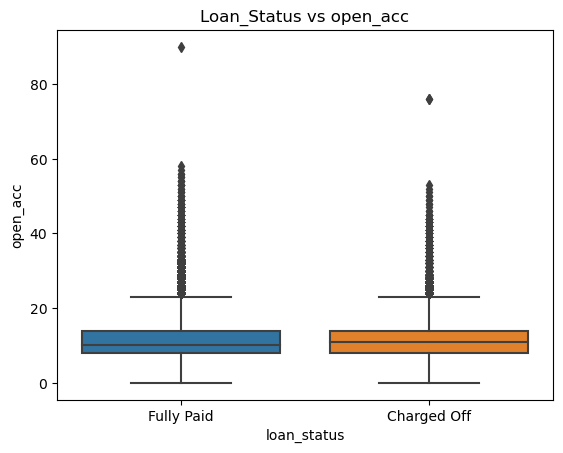

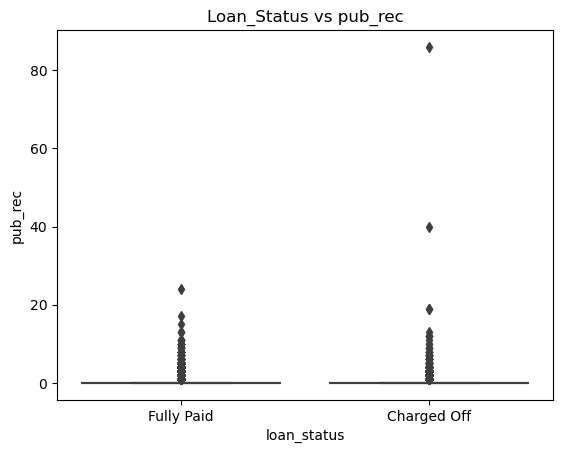

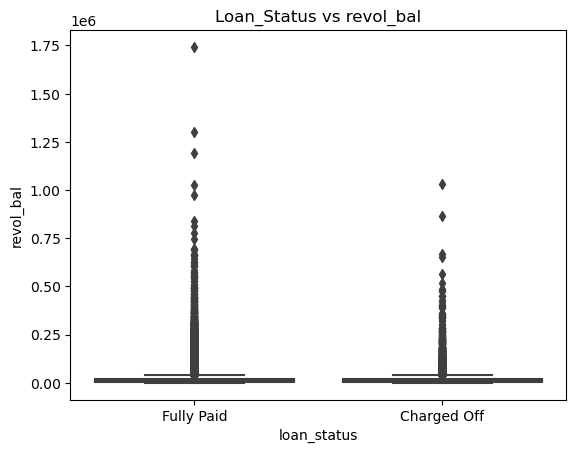

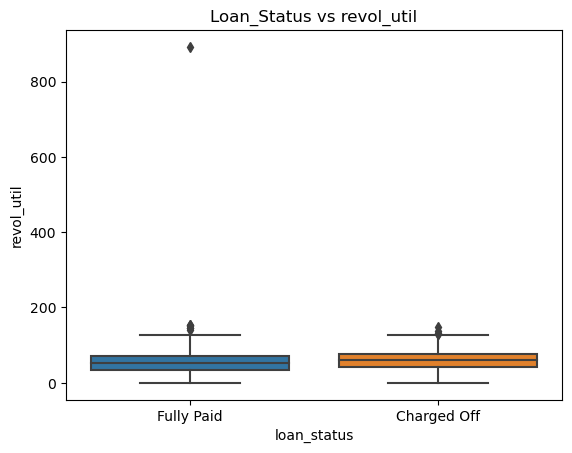

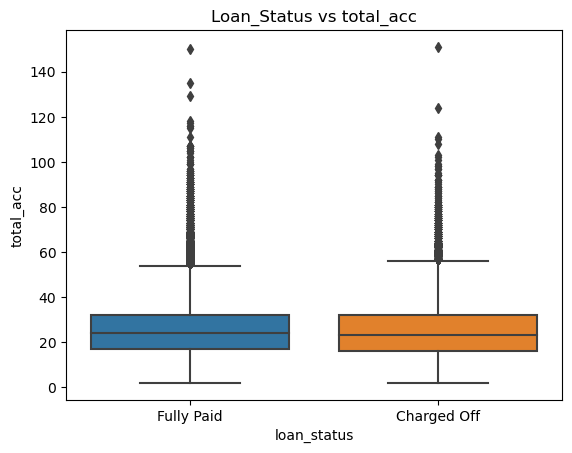

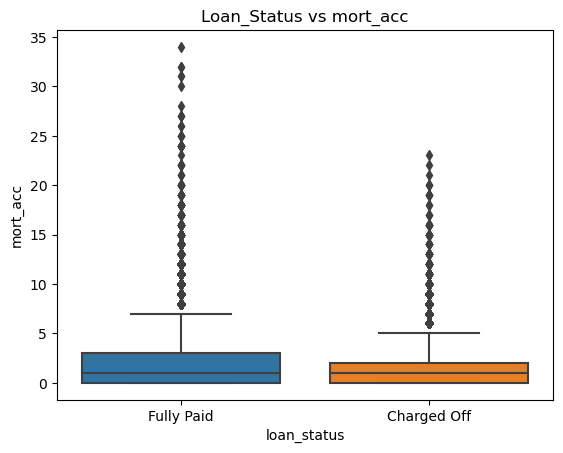

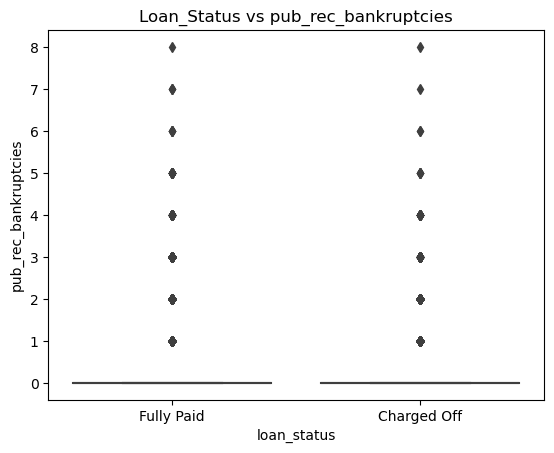

In [11]:
for feature in num_columns:
    sns.boxplot(x='loan_status', y=feature, data=data)
    plt.title(f'Loan_Status vs {feature}')
    plt.show()


### 3.5.2 Loan_Status vs Categorical Features

In [12]:
# this also might take a bit of time 

'''

for feature in cat_columns:
    sns.countplot(x=feature, hue='loan_status', data=data)
    plt.title(f'Loan_Status vs {feature}')
    plt.show()
'''

"\n\nfor feature in cat_columns:\n    sns.countplot(x=feature, hue='loan_status', data=data)\n    plt.title(f'Loan_Status vs {feature}')\n    plt.show()\n"

# Step 4: Data Preprocessing

### 4.1 Handling Missing Values

In [13]:
# Check for missing values
print(data.isnull().sum())


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


In [14]:
# Fill missing values in numerical columns with the median
for col in num_columns:
    data[col].fillna(data[col].median(), inplace=True)


C:\Users\abliv\AppData\Local\Temp\ipykernel_14708\82802099.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [15]:
# Fill missing values in categorical columns with the mode
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\abliv\AppData\Local\Temp\ipykernel_14708\481939635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [16]:
# Check if there are any remaining missing values
print(data.isnull().sum())

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


### 4.2 Encoding Categorical Variables

In [17]:

# 1. Label Encoding for 'grade' and 'sub_grade' (Ordinal Variables)
# 'grade' can be manually encoded, and 'sub_grade' can be ordinally encoded as it contains values like A1, A2, etc.

# Map grades (A > B > C > D > E > F > G)
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data['grade'] = data['grade'].map(grade_mapping)

# Convert 'sub_grade' to integers based on ordinal relationship
data['sub_grade'] = data['sub_grade'].apply(lambda x: int(x[1]))

# 2. Binary Encoding for 'loan_status'
data['loan_status'].replace({'N': 0, 'Y': 1}, inplace=True)

# 3. One-Hot Encoding for Nominal Variables
nominal_columns = ['term', 'home_ownership', 'verification_status', 'purpose', 
                   'initial_list_status', 'application_type']

# Apply pd.get_dummies to these columns
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

# 4. Date Handling for 'issue_d' and 'earliest_cr_line'
# Convert 'issue_d' to datetime and extract useful features
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month
data.drop('issue_d', axis=1, inplace=True)

# Convert 'earliest_cr_line' to datetime and extract useful features
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year
data.drop('earliest_cr_line', axis=1, inplace=True)

# Check for the new dataframe after encoding
print(data.head())


C:\Users\abliv\AppData\Local\Temp\ipykernel_14708\4150872361.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['loan_status'].replace({'N': 0, 'Y': 1}, inplace=True)


   loan_amnt  int_rate  installment  grade  sub_grade  \
0    10000.0     11.44       329.48      2          4   
1     8000.0     11.99       265.68      2          5   
2    15600.0     10.49       506.97      2          3   
3     7200.0      6.49       220.65      1          2   
4    24375.0     17.27       609.33      3          5   

                 emp_title emp_length  annual_inc  loan_status  \
0                Marketing  10+ years    117000.0   Fully Paid   
1          Credit analyst     4 years     65000.0   Fully Paid   
2             Statistician   < 1 year     43057.0   Fully Paid   
3          Client Advocate    6 years     54000.0   Fully Paid   
4  Destiny Management Inc.    9 years     55000.0  Charged Off   

                     title  ...  purpose_renewable_energy  \
0                 Vacation  ...                     False   
1       Debt consolidation  ...                     False   
2  Credit card refinancing  ...                     False   
3  Credit card r

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   emp_title                            396030 non-null  object 
 6   emp_length                           396030 non-null  object 
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  object 
 9   title                                396030 non-null  object 
 10  dti                                  396030 non-null  float64
 11  open_acc     

### 4.3: Feature Scaling

Random Forest is not sensitive to scaling, but if we were using distance-based algorithms, we would scale the features.

# Step 5: Feature Engineering

In [19]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'annual_inc', 'loan_status', 'title', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'issue_year',
       'issue_month', 'earliest_cr_line_year'],
      dtype='objec

In [20]:
# Income-Loan Ratio: Calculated as the ratio of loan amount to annual income
 # Calculate the mean of annual_inc, ignoring zero values
mean_annual_inc = data.loc[data['annual_inc'] != 0, 'annual_inc'].mean()

# Replace zero annual_inc with the mean annual_inc
data['annual_inc'] = data['annual_inc'].replace(0, mean_annual_inc)

# Calculate income_loan_ratio
data['income_loan_ratio'] = data['loan_amnt'] / data['annual_inc']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   emp_title                            396030 non-null  object 
 6   emp_length                           396030 non-null  object 
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  object 
 9   title                                396030 non-null  object 
 10  dti                                  396030 non-null  float64
 11  open_acc     

# Step 6: Feature Selection

### 6.1 Feature Importance from Random Forest

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   emp_title                            396030 non-null  object 
 6   emp_length                           396030 non-null  object 
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  object 
 9   title                                396030 non-null  object 
 10  dti                                  396030 non-null  float64
 11  open_acc     

In [23]:
data = data.drop(columns=['emp_title','emp_length','address','title'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   grade                                396030 non-null  int64  
 4   sub_grade                            396030 non-null  int64  
 5   annual_inc                           396030 non-null  float64
 6   loan_status                          396030 non-null  object 
 7   dti                                  396030 non-null  float64
 8   open_acc                             396030 non-null  float64
 9   pub_rec                              396030 non-null  float64
 10  revol_bal                            396030 non-null  float64
 11  revol_util   

In [24]:
# Check for infinite values
print(data.isin([np.inf, -np.inf]).sum())


loan_amnt                              0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
annual_inc                             0
loan_status                            0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
mort_acc                               0
pub_rec_bankruptcies                   0
term_ 60 months                        0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_con

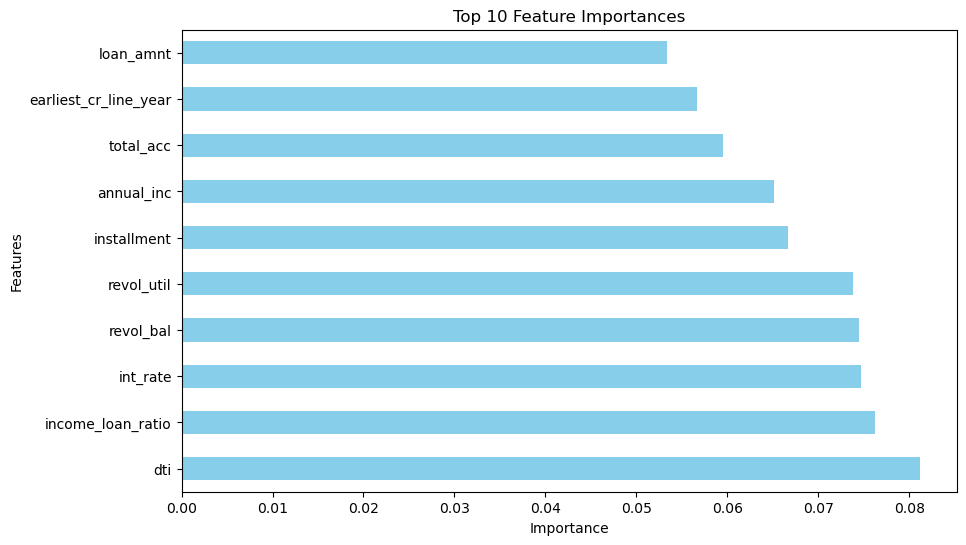

dti                      0.081124
income_loan_ratio        0.076196
int_rate                 0.074690
revol_bal                0.074499
revol_util               0.073837
installment              0.066670
annual_inc               0.065163
total_acc                0.059488
earliest_cr_line_year    0.056665
loan_amnt                0.053313
dtype: float64


In [25]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

# Fit a preliminary model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the importances in descending order and select the top 10 features
top_10_importances = importances.sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_importances.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the top 10 feature importances
print(top_10_importances)


# Step 7: Handling Imbalanced Data

### 7.1 Checking Imbalance

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


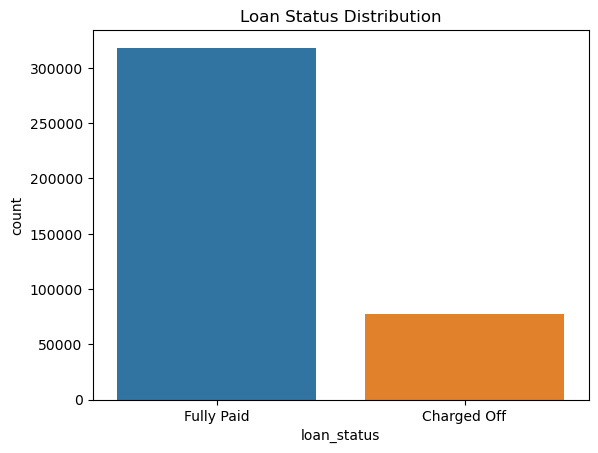

In [26]:
print(data['loan_status'].value_counts())

sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()


### 7.2 Applying SMOTE (Synthetic Minority Over-sampling Technique)

In [27]:
X

,loan_amnt,int_rate,installment,grade,sub_grade,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,issue_year,issue_month,earliest_cr_line_year,income_loan_ratio
0,10000.0,11.44,329.48,2,4,117000.0,26.24,16.0,0.0,36369.0,...,False,True,False,True,True,False,2015,1,1990,0.085470
1,8000.0,11.99,265.68,2,5,65000.0,22.05,17.0,0.0,20131.0,...,False,False,False,False,True,False,2015,1,2004,0.123077
2,15600.0,10.49,506.97,2,3,43057.0,12.79,13.0,0.0,11987.0,...,False,False,False,False,True,False,2015,1,2007,0.362310
3,7200.0,6.49,220.65,1,2,54000.0,2.60,6.0,0.0,5472.0,...,False,False,False,False,True,False,2014,11,2006,0.133333
4,24375.0,17.27,609.33,3,5,55000.0,33.95,13.0,0.0,24584.0,...,False,False,False,False,True,False,2013,4,1999,0.443182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,2,4,40000.0,15.63,6.0,0.0,1990.0,...,False,False,False,True,True,False,2015,10,2004,0.250000
396026,21000.0,12.29,700.42,3,1,110000.0,21.45,6.0,0.0,43263.0,...,False,False,False,False,True,False,2015,2,2006,0.190909
396027,5000.0,9.99,161.32,2,1,56500.0,17.56,15.0,0.0,32704.0,...,False,False,False,False,True,False,2013,10,1997,0.088496
396028,21000.0,15.31,503.02,3,2,64000.0,15.88,9.0,0.0,15704.0,...,False,False,False,False,True,False,2012,8,1990,0.328125


In [28]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_res).value_counts())


loan_status
Fully Paid     318357
Charged Off    318357
Name: count, dtype: int64


# Step 8: Model Building

### 8.1 Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


### 8.2. Building the Random Forest Model

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
# Predict the target labels for the test set
y_pred = rf_model.predict(X_test)


In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.873938889456036


In [33]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[50916 12784]
 [ 3269 60374]]


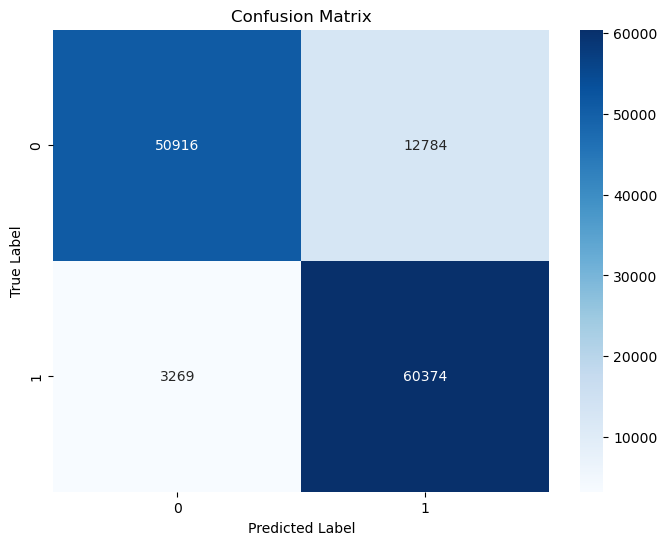

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8728

    The accuracy is approximately 87.28%, which means that the model correctly predicted whether a loan was "Fully Paid" or "Charged Off" about 87.3% of the time.
    Out of all the predictions made, 87.28% were correct.

### 9 Classification Report

In [35]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 Charged Off       0.94      0.80      0.86     63700
  Fully Paid       0.83      0.95      0.88     63643

    accuracy                           0.87    127343
   macro avg       0.88      0.87      0.87    127343
weighted avg       0.88      0.87      0.87    127343



### 10 Confusion Matrix

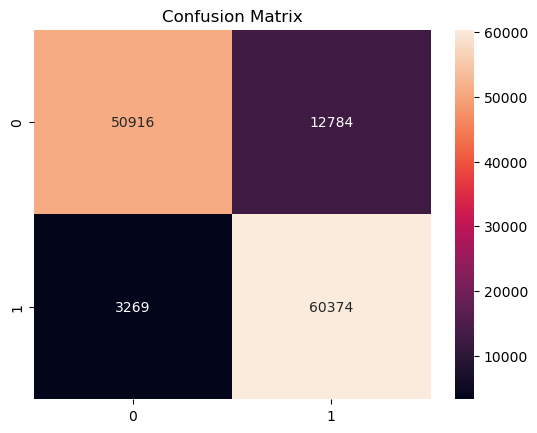

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
